# JUPITER TEAM MOVIE ANALYSIS PROJECT

## Analysis Goals
Our team was tasked by Microsoft to advise their fledgling studio on what types of movies would be the most successful. Our goal in this project is to give recommendations to Microsoft team by performing three in-depth analyses about movie studios, movie genres, and cast & crew. Our collective recommendations can be found at the last section of this report.   

## The Data
Our data came from a number of sources, as no single database held all of the information required for our analysis.

IMDB - Internet Movie Database - The go-to website for information on all things movies, this served as the primary base for compiling the necessary information. IMDB's size was a double edged sword, its tables often consisting of tens of thousands of rows. This gave us a fantastic number of films and personnel to investigate, but sifting through that much data had its own challenges as well.

TheNumbers.com - For all of IMDB's greatness, it does not provide us with the financial information we wanted to add to our analysis. Thenumbers.com is a website wholly devoted to tracking budgets and revenues for films. The fact that it tracked both was critical, because that allowed us to calculate net profit by adding together foreign and domestic revenue, then subtracting the budget.

TMDB - The Movie Database - This database provided additional ratings, genres, and financial data.

Box Office Mojo - This database was combined with the others to give additional ratings and popularity data.

We will start by importing the libraries needed for perfoming data exploration, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Movie Studios Analysis

## Business Recommendation

   I'm going to recommend that Microsoft mirror the competition in this industry. The Walt Disney Company purchased 21st Century Fox in 2019 for 71.3 billion, Amazon just recently purchased MGM studios for 8.4 billion, and Warner Media merged with Discovery. Sony Pictures would be a really interesting acquisiton for a tech giant looking to enter the film industry, and I'll show why in this analysis. 


### 1.1. Reading the Data 

In [2]:
tmdb_data = pd.read_csv('data/tmdb.movies.csv', index_col=0)
bom_data = pd.read_csv('data/bom.movie_gross.csv')

In [3]:
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 1.2. Data Merging & Cleaning
Examining the dataframes above, we can see that they all have a column named title. Let's merge the information on the
title column. 

In [5]:
df_merge = pd.merge(tmdb_data, bom_data, on='title')

#Create new dataframe with the columns we want 
new_df = df_merge[['title', 'year', 'studio', 'popularity', 'domestic_gross', 'foreign_gross']].sort_values(by='year', ascending=False)
new_df.head()

,title,year,studio,popularity,domestic_gross,foreign_gross
2702,Last Letter,2018,CL,0.600,181000.0,NaN
2555,Mortal Engines,2018,Uni.,40.095,16000000.0,67700000
2566,Ready Player One,2018,WB,30.029,137700000.0,445200000
2565,Mary Poppins Returns,2018,BV,30.419,172000000.0,177600000
2564,The Meg,2018,WB,31.397,145400000.0,384800000


### 1.2.1. Data Cleaning
Add foreign and domestic profits together to get an international picture of how much each movie has made. 

In [6]:
# Convert the domestic gross column to a numeric column so it can be added to the foreign gross column and fill all
# NaN values. 
new_df['domestic_gross'] = pd.to_numeric(new_df['domestic_gross'])
new_df['domestic_gross'] = new_df['domestic_gross'].fillna(0)

# remove commas from foreign gross, convert to a numeric column, and remove all NaN values. 
new_df['foreign_gross'].replace(',','', regex=True, inplace=True)
new_df['foreign_gross'] = pd.to_numeric(new_df['foreign_gross'])
new_df['foreign_gross'] = new_df['foreign_gross'].fillna(0)

# Create a new column adding the domestic and foreign gross values together to show each title's total gross 
new_df['total_gross'] = new_df['domestic_gross'] + new_df['foreign_gross']

# Limit results to only the past 10 years (2011)
new_df = new_df.loc[new_df['year'] >= 2011] 

# Order our new dataframe by total_gross to view the top grossing films of the last ten years. 
new_df = new_df.sort_values(by='total_gross', ascending=False)
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross,total_gross
1622,Avengers: Age of Ultron,2015,BV,44.383,459000000.0,946400000.0,1.405400e+09
608,Black Panther,2018,BV,2.058,700100000.0,646900000.0,1.347000e+09
609,Black Panther,2018,BV,44.140,700100000.0,646900000.0,1.347000e+09
2320,Star Wars: The Last Jedi,2017,BV,34.293,620200000.0,712400000.0,1.332600e+09
2319,Star Wars: The Last Jedi,2017,BV,34.293,620200000.0,712400000.0,1.332600e+09
...,...,...,...,...,...,...,...
1132,Into the White,2013,Magn.,7.072,700.0,0.0,7.000000e+02
555,Death of a Superhero,2012,Trib.,5.158,600.0,0.0,6.000000e+02
2423,2:22,2017,Magn.,11.316,400.0,0.0,4.000000e+02
2251,Satanic,2016,Magn.,6.403,300.0,0.0,3.000000e+02


### Note*
Something to keep in mind is that Disney acquired 21st Century Fox in 2019. The data here from Fox shows movies that were made before 2019, so they are still considered to be made by Fox during the time this data was gathered. 


## 1.3. Data Exploration and Questions
In this step I'll explore the data set and answer these questions: 

1. Which studios grossed the most money in the past 10 years?
2. Which studios made the most movies in the past 10 years?
3. Which studios made the most popular movies in the last 10 years?

### 1.3.1.  Which studios grossed the most money in the past 10 years?

In [7]:
# Create a new data frame with the total_gross as the values and the columns as the studios/ 
studio_totals = new_df.pivot_table(index=new_df.index, values='total_gross', columns='studio')

# Make a dictionary of all these studios and their total gross, then sort them 
# from greatest to least. 
# Dictionary of the dataframe from studio_totals
dict_studio_totals = dict(studio_totals.sum(0))

# Find the average of all of the studios total profits 
list_studio_values = list(studio_totals.sum(0))
list_studio_index = list(studio_totals.sum(0).index)
avg_list_studio_values = sum(list_studio_values) / len(list_studio_values)

#I want my plot to show studios that had at or above the average total_gross of all films.  
dict_studio_totals = dict((k, v) for k, v in dict_studio_totals.items() if v >= avg_list_studio_values) 

#Now I want to sort my values from greatest to least
dict_studio_totals = {k: v for k, v in sorted(dict_studio_totals.items(), key=lambda item: item[1], reverse=True)}
dict_studio_totals

{'BV': 46440514631.7,
 'Fox': 30095166596.0,
 'Uni.': 27890183191.4,
 'WB': 24012620999.0,
 'Sony': 18114886498.0,
 'Par.': 16730279696.0,
 'WB (NL)': 10508699999.0,
 'LGF': 8426402400.0,
 'LG/S': 4496523999.0,
 'P/DW': 3420300000.0,
 'Wein.': 3359832697.0,
 'Focus': 2513440000.0,
 'FoxS': 2404889300.0,
 'SGem': 1993187000.0,
 'WGUSA': 1828468400.0,
 'STX': 1733600000.0,
 'TriS': 1711315000.0,
 'Rela.': 1679894000.0,
 'ORF': 1421526999.0}

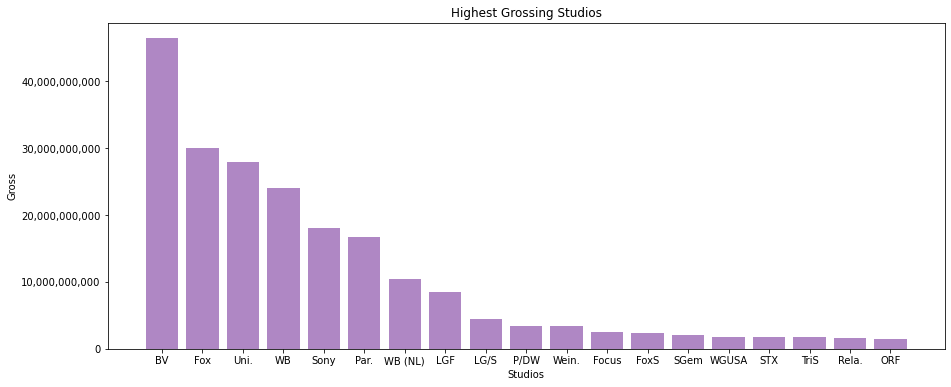

In [8]:
#I'll get my x axis from the keys in the dictionary and my height from the values in the dictionary above. 
x = list(dict_studio_totals.keys())
height = list(dict_studio_totals.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Highest Grossing Studios')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross');

### Note* 
Disney is represented as BV. Disney appears to gross the most money based on this data. 

### 1.3.2. Which studios made the most movies in the last 10 years?

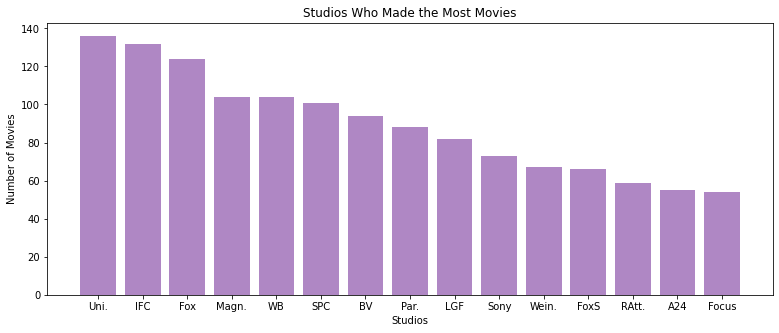

In [9]:
# Show the value counts for each studio that gives us the number of movies each studio made. 
studio_counts = new_df['studio'].value_counts()
x = list(studio_counts.index)
y = list(studio_counts.values)

#Let's only show studios that made 50 or more movies. 
height = []
for i in y: 
    if i >= 50: 
        height.append(i)

fig, ax = plt.subplots(figsize=(13,5))

ax.bar(x[0:15], height, color='#af87c4')

ax.set_title('Studios Who Made the Most Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Number of Movies');

### Note*
It appears that just because the studio makes a lot of movies, doesn't mean they gross the most money. Even though Disney made the most money, they didn't make the highest quantity of movies.

### 1.3.3. Which studios made the most popular movies in the last 10 years?

In [10]:
# Sort our dataframe to see the most popular movies
popularity_df = new_df.sort_values(by='popularity', ascending=False)

# Create a dataframe that shows the top 50 most popular movies in the last 10 years 
popularity_df = popularity_df[['studio', 'title', 'popularity']]
top_pop = popularity_df.pivot_table(index=new_df.index, values='popularity', columns='studio').head(50)

# Create a dictionary showing the popularity for each studio
dict_top_pop = dict(top_pop.sum(0))

# Now limit those results to see studios that had higher popularity than 8. 
dict_top_pop = dict((k, v) for k, v in dict_top_pop.items() if v > 8) 

# Sort them from greatest to least 
dict_top_pop = {k: v for k, v in sorted(dict_top_pop.items(), key=lambda item: item[1], reverse=True)}
dict_top_pop

{'WB': 74.477,
 'IFC': 56.138000000000005,
 'BV': 55.827999999999996,
 'Fox': 51.71600000000001,
 'LGF': 25.131,
 'Wein.': 15.641,
 'BG': 15.521999999999998,
 'SPC': 10.952,
 'BST': 9.486,
 'STX': 8.574,
 'Anch.': 8.322000000000001,
 'WGUSA': 8.16}

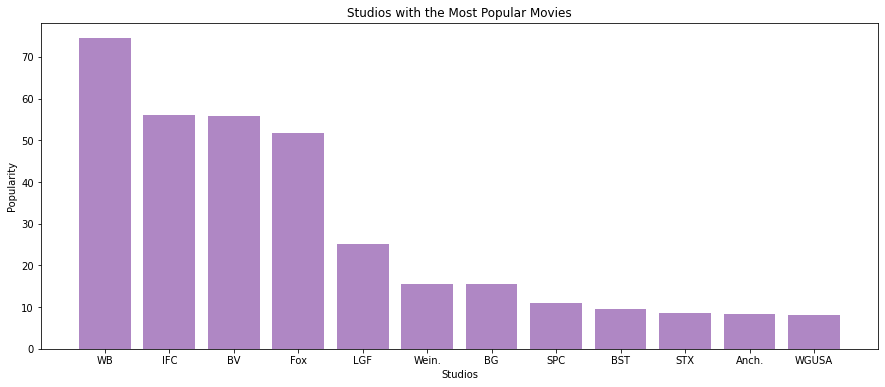

In [11]:
x = list(dict_top_pop.keys())
height = list(dict_top_pop.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios with the Most Popular Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Popularity');

## 1.4. Merging New Data
I'll bring in new data that contains the production budgets so I can calculate net profits and ROI%. I'll clean this data up a bit, as well. 

In [12]:
#Read in our new data set
tn_data = pd.read_csv('data/tn.movie_budgets.csv')
tn_data = tn_data[['movie', 'production_budget']]

#Clean up this data 
#remove the commas from the data so we can convert this column to a numeric column to calculate our net profit.
tn_data['production_budget'].replace(',','', regex=True, inplace=True)
#remove the dollar signs.
tn_data['production_budget'].replace({'\$':''}, regex = True, inplace=True)

#rename 'movie' to 'title' for an easier merge since the other data shows 'title' for the movie names
tn_data = tn_data.rename(columns={"movie": "title"})
tn_data

,title,production_budget
0,Avatar,425000000
1,Pirates of the Caribbean: On Stranger Tides,410600000
2,Dark Phoenix,350000000
3,Avengers: Age of Ultron,330600000
4,Star Wars Ep. VIII: The Last Jedi,317000000
...,...,...
5777,Red 11,7000
5778,Following,6000
5779,Return to the Land of Wonders,5000
5780,A Plague So Pleasant,1400


### 1.4.1. Merge the new data

In [13]:
# Merge the new data set on the shared 'title' column. 
df_merge = pd.merge(new_df, tn_data, on='title') 
df_merge = df_merge[['title', 'studio', 'year', 'total_gross', 'production_budget']]
df_merge['production_budget'] = pd.to_numeric(df_merge['production_budget'])

# Create a new column for net profit and ROI%
df_merge['net_profit'] = df_merge['total_gross'] - df_merge['production_budget']
net_profit_df = df_merge

# ROI = 100(net profit / budget)
net_profit_df['ROI%'] = 100 * (net_profit_df['net_profit'] / net_profit_df['production_budget'])

#Sort them to see the studios with the highest net profit. 
net_profit_df.sort_values(by='net_profit', ascending=False, inplace=True)
net_profit_df

,title,studio,year,total_gross,production_budget,net_profit,ROI%
1,Black Panther,BV,2018,1.347000e+09,200000000,1.147000e+09,573.500000
2,Black Panther,BV,2018,1.347000e+09,200000000,1.147000e+09,573.500000
3,Jurassic World: Fallen Kingdom,Uni.,2018,1.309500e+09,170000000,1.139500e+09,670.294118
4,Frozen,BV,2013,1.276400e+09,150000000,1.126400e+09,750.933333
5,Frozen,BV,2013,1.276400e+09,150000000,1.126400e+09,750.933333
...,...,...,...,...,...,...,...
565,R.I.P.D.,Uni.,2013,7.830000e+07,130000000,-5.170000e+07,-39.769231
624,Monster Trucks,Par.,2017,6.450000e+07,125000000,-6.050000e+07,-48.400000
1208,Evolution,IFC,2016,2.480000e+04,80000000,-7.997520e+07,-99.969000
1209,Evolution,IFC,2016,2.480000e+04,80000000,-7.997520e+07,-99.969000


### 1.4.2. What studios had the highest net profit?

In [14]:
#Created a new table showing the columns as studios and values as their net profits. 
studio_profits = net_profit_df.pivot_table(index=df_merge.index, values='net_profit', columns='studio')

#Find the average net profit for all the studios. I want to calculate the average to see the studios that made at or
#above this amount. 
list_studio_profits = list(studio_profits.sum(0))
list_studio_index = list(studio_profits.sum(0).index)
avg_list_studio_profits = sum(list_studio_profits) / len(list_studio_profits)
avg_list_studio_profits

#Make a dictionary of the studio_profits dataframe to get the keys as the studio name and their values as net profit.
a = dict(studio_profits.sum(0))
net_profit_keys = list(a.keys())
net_profit_values = list(a.values())

#I want to show the studios that had at or above average net profit.  
b = dict((k, v) for k, v in a.items() if v >= avg_list_studio_profits) 

#Now I want to sort my values from greatest to least and show studios with the highest net profits. 
c = {k: v for k, v in sorted(b.items(), key=lambda item: item[1], reverse=True)}
c

{'BV': 28799801369.5,
 'Fox': 20495033596.0,
 'Uni.': 19510861191.4,
 'WB': 14879520998.0,
 'Sony': 12798499998.0,
 'Par.': 8942766996.0,
 'WB (NL)': 7066199999.0,
 'LGF': 5392518000.0,
 'P/DW': 2615300000.0,
 'LG/S': 2492493999.0,
 'Wein.': 2077783397.0}

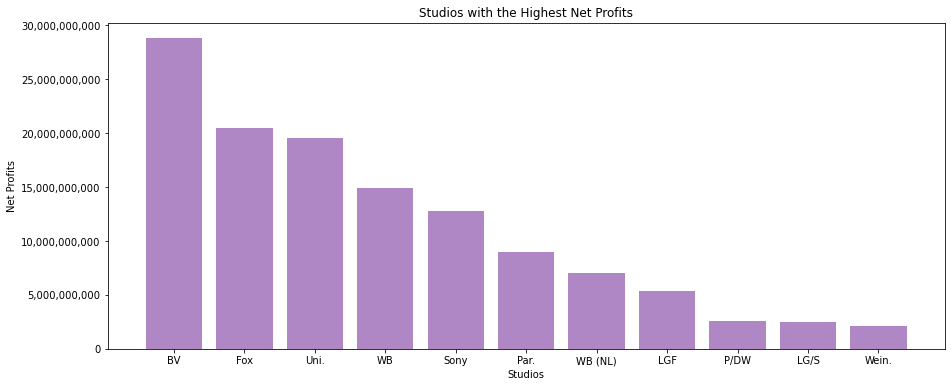

In [15]:
c_keys = list(c.keys())
c_values = list(c.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=c_keys, height=c_values, color='#af87c4')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Studios with the Highest Net Profits')
ax.set_xlabel('Studios')
ax.set_ylabel('Net Profits');

The visualizations for net profit show Disney still has the highest profits. 

### 1.4.3. ROI%.

In [16]:
# Create a dataframe with each studio's ROI% as a value and the studios as columns 
studio_roi_df = net_profit_df.pivot_table(index=df_merge.index, values='ROI%', columns='studio')

# Find the average ROI% so we can look at studios with above average ROI%
list_studio_roi = list(studio_roi_df.sum(0))
list_roi_index = list(studio_roi_df.sum(0).index)
avg_list_studio_roi = sum(list_studio_roi) / len(list_studio_roi)
avg_list_studio_roi

# Create a dictionary showing each studio's ROI% 
a = dict(studio_roi_df.sum(0))
studio_roi_df_keys = list(a.keys())
studio_roi_df_values = list(a.values())

#I want to show the studios that had at or above average ROI%.  
b = dict((k, v) for k, v in a.items() if v >= avg_list_studio_roi) 

#Now I want to sort my values from greatest to least and show studios with the highest ROI%. 
c = {k: v for k, v in sorted(b.items(), key=lambda item: item[1], reverse=True)}
c

{'Uni.': 102350.77846329947,
 'WB (NL)': 64790.53066726985,
 'Par.': 36643.83359765203,
 'Fox': 27933.836389553227,
 'WB': 26675.473175505667,
 'LG/S': 23352.14995755767,
 'BV': 18953.12201122903,
 'Sony': 17554.63871073789,
 'LGF': 16668.087357812623,
 'FoxS': 16342.791022944726,
 'Wein.': 14395.870932086902,
 'Focus': 8198.029771815489,
 'TriS': 7878.192455828485,
 'A24': 7324.1393665158375,
 'FD': 6934.615873015872,
 'ORF': 6605.56696154593,
 'SPC': 6340.5804291464465}

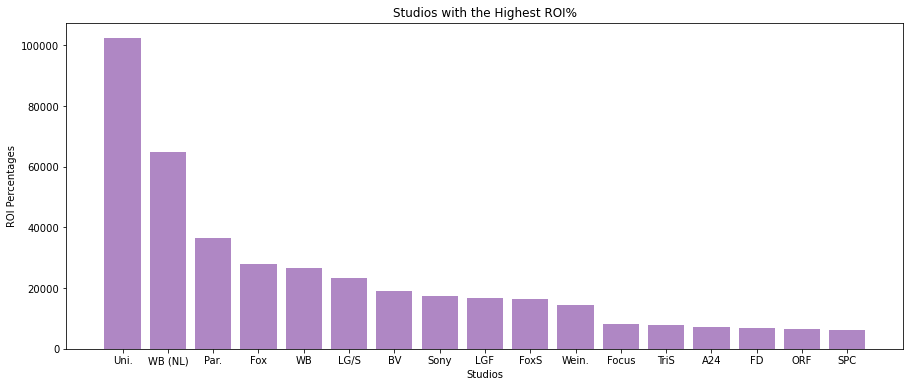

In [17]:
#Visualization of each studio's ROI%
fig, ax = plt.subplots(figsize=(15,6))

x = list(c.keys())
height = list(c.values())

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios with the Highest ROI%')
ax.set_xlabel('Studios')
ax.set_ylabel('ROI Percentages');

## 1.5. Exploring the Stats

I'll examine the the average ROI% and average net profits that each studio made for each movie. 

{'WB (NL)': 1661.2956581351243,
 'Uni.': 781.3036523915987,
 'LG/S': 686.8279399281668,
 'Par.': 495.1869405088111,
 'FoxS': 340.4748129780152,
 'LGF': 297.64441710379685,
 'WB': 272.1987058725068,
 'Sony': 258.1564516284985,
 'Fox': 251.65618368966864,
 'BV': 246.14444170427313}

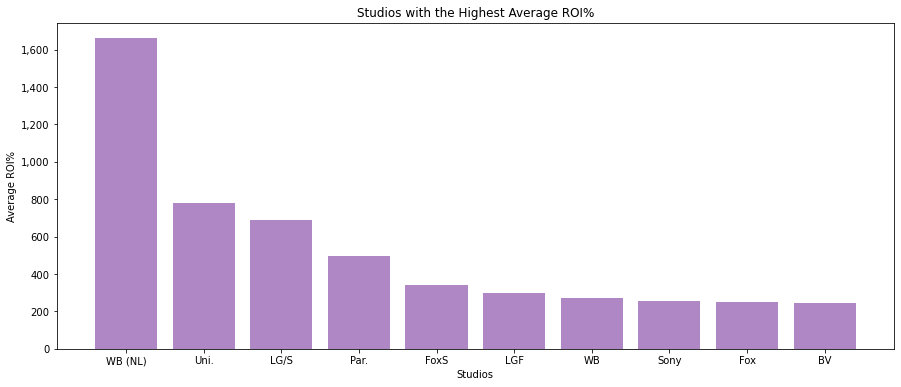

In [18]:
# Create a dataframe of the stats for studios that had the highest average ROI%
roi_stats = studio_roi_df.describe()[1:4:5]
avg_roi = roi_stats[['Uni.', 'WB (NL)', 'Par.', 'Fox', 'WB', 'LG/S', 'BV', 'Sony', 'LGF', 'FoxS']]

# Create a dictionary where the keys are the studios and the means are the values. 
a = dict(avg_roi.sum(0))

# Sort them from greatest to least
a = {k: v for k, v in sorted(a.items(), key=lambda item: item[1], reverse=True)}

# Visualizations for average ROI% of each studio.
x = list(a.keys())
height = list(a.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Studios with the Highest Average ROI%')
ax.set_xlabel('Studios')
ax.set_ylabel('Average ROI%')
a

{'BV': 374023394.40909094,
 'Sony': 188213235.2647059,
 'Fox': 184639942.3063063,
 'WB (NL)': 181184615.35897437,
 'WB': 151831846.91836736,
 'Uni.': 148937871.69007635,
 'Par.': 120848202.64864865,
 'LGF': 96294964.28571428,
 'LG/S': 73308647.02941176,
 'Wein.': 47222349.93181818}

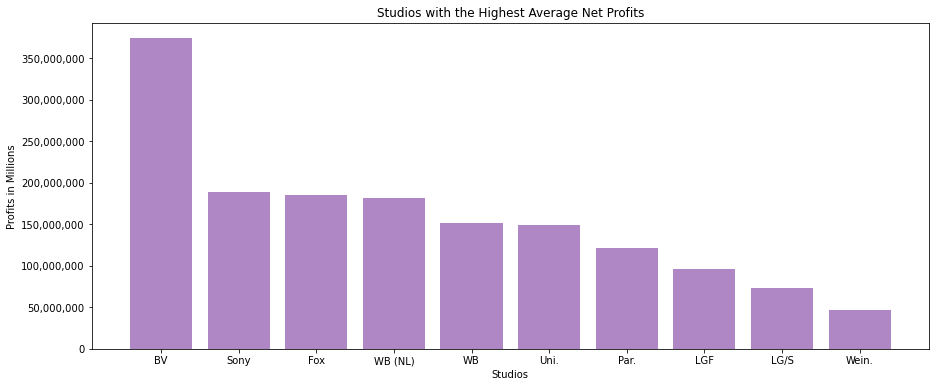

In [19]:
# Create a dataframe of the stats for studios that had the highest net profits. 
studio_profit_stats = studio_profits.describe()
stats = studio_profit_stats[['BV', 'Fox', 'Uni.', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S', 'Wein.']]

# Show the average net profits for each studio in our stats dataframe 
mean_np_studios = stats[1:4:5]

# Create a dictionary where the keys are the studios and the means are the values. 
d = dict(mean_np_studios.sum(0))

# Sort them from greatest to least
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

# Visualizations for average net profits of each studio.
x = list(d.keys())
height = list(d.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Studios with the Highest Average Net Profits')
ax.set_xlabel('Studios')
ax.set_ylabel('Profits in Millions')
d

## 1.6. Recommendations

It appears Sony Pictures has the second highest net profits on average for each film they've made. I'd recommend Microsoft make a bid on Sony Pictures for their new movie studio. Several of the studios sitting at the top of the data alongside Sony Pictures have already been acquired or have merged with larger companies in the last few years. I wouldn't recommend buying Disney because Disney is currently valued over 330 billion dollars according to Yahoo Finance statistics on their market cap (https://finance.yahoo.com/quote/DIS/key-statistics?p=DIS). I wouldn't recommend 21st Century Fox, because Disney acquired them in 2019 for 71.3 billion. I wouldn't recommend Warner Brothers because they merged with Discovery as of this year. I wouldn't recommend Universal because they're owned by Comcast. I wouldn't recommend MGM Studios because they were recently purchased by Amazon for $8.45 billion in May of this year. This leaves Sony Pictures as the dangling cheese for potentially several companies. The data here shows their films are profitable and their average net profits are second to Disney based on this data. I'm also not the first to come to this conclusion. Digging deeper into the questions from this data, I found a Vox article from 2017 with a similar suggestion that "Sony Pictures would make an interesting buy for a tech giant": https://www.vox.com/2017/1/17/14273598/sony-pictures-buy-amazon-alphabet-facebook-apple. 

According to this article, it is believed by Vox that Sony Pictures may have been worth about $30 billion in 2017. That would be a cheaper buy than what Disney paid for 21st Century Fox. 

Also, Sony Pictures owns the film rights for the Spider-Man movies. The rights for the Spider Man movies are so valuable, Sony won't just give them up. Disney had to write up licensing contracts with Sony Pictures to be able to feature Spider Man in the Marvel Universe. Spider-Man films are some of Sony Pictures highest grossing, collectively grossing over 6 billion. If Microsoft can acquire Sony Pictures, Microsoft could have those rights. More information on this can be found here: https://en.wikipedia.org/wiki/Spider-Man_in_film. 

---

# 2. Movie Genres Analysis

## Business Recommendation
   One of the business recommendation we are delivering to the Microsoft Studio team will be about choosing best genres for their future movies. Which genre categories have more ratings, and/or popularity will determine our recommendations. For this analysis, we will use IMDB and TMDB data to measure average ratings and popularity, respectively. In this work, we will focus on the analysis of the movies with release year between 2010 and 2019.
   
   In the first part of the analysis, we will investigate average ratings and genre relationship. Secondly, we will use popularity measure to look into each genre. In the final part, we will compare the results from each analysis, and make recommendations accordingly.


## 2.1. Movie Genres vs. Average Rating Relationship

### 1.1. Importing the Data

First we need to read IMDB ratings data and IMDB movie basic data files. 

In [20]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [21]:
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


### 2.1.2. Preparing Dataframes 

####  Merging Dataframes
Before analyzing the data, we need to construct the desired dataframe from IMDB title basics table and IMDB title ratings table. 

First of all, let's start with merging these two datafames by using 'tconst' column in both dataframes, and create a new 'imdb_title_and_ratings' dataframe.  

In [22]:
imbd_title_and_ratings = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst')
imbd_title_and_ratings

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


When we sort 'imbd_title_and_ratings' dataframe by the 'start_year' column, it is seen that the data contains movies from 2010 to 2019:

In [23]:
imbd_title_and_ratings.sort_values(by='start_year', ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
23991,tt5929354,5.1,18,"Out of Sight, Out of Mind","Out of Sight, Out of Mind",2019,131.0,Drama
24002,tt5969180,6.5,1312,I Hate Kids,I Hate Kids,2019,89.0,Comedy
24012,tt6032090,8.6,15,Use Me,Use Me,2019,NaN,Thriller
24028,tt6081668,7.6,51,Mating,Parningsmarknaden,2019,93.0,Documentary
...,...,...,...,...,...,...,...,...
36328,tt1754573,8.8,21,Taliya.Date.Com,Taliya.Date.Com,2010,54.0,"Biography,Comedy,Documentary"
36325,tt1753960,7.4,67,Israel vs Israel,Israel vs Israel,2010,58.0,Documentary
17412,tt1640202,4.3,3706,Çok Filim Hareketler Bunlar,Çok Filim Hareketler Bunlar,2010,134.0,Comedy
17411,tt1639457,5.6,11,Indiana Jones und der Speer des Schicksals,Indiana Jones und der Speer des Schicksals,2010,66.0,"Action,Adventure"


Now, we need to sort the dataframe from highest to lowest rating movie, and filter out movies with vote numbers less than 500 for respresentation concerns. 

In [24]:
sorted_df = imbd_title_and_ratings.sort_values(by='averagerating', ascending=False)
sorted_df = sorted_df[sorted_df['numvotes']> 500]
sorted_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
73780,tt8718580,9.7,639,Eghantham,Eghantham,2018,125.0,Drama
63149,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
3908,tt9680166,9.6,624,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy
54115,tt4131686,9.6,1339,I Want to Live,I Want to Live,2015,106.0,"Adventure,Biography,Documentary"
19606,tt9343826,9.6,808,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family"
...,...,...,...,...,...,...,...,...
67090,tt3166658,1.1,502,"Kanagawa University of Fine Arts, Office of Fi...",Kanagawa geijutsu daigaku eizou gakka kenkyuus...,2013,70.0,Drama
9532,tt5311054,1.1,710,Browncoats: Independence War,Browncoats: Independence War,2015,98.0,"Action,Sci-Fi,War"
65791,tt3235258,1.0,510,My First Love,Hatsukoi,2013,82.0,Drama
63269,tt7923374,1.0,674,Badang,Badang,2018,105.0,"Comedy,Fantasy"


Now, we need to split multiple genre names into separate rows by using explode function.

In [25]:
sorted_df['genres']= sorted_df['genres'].str.split(",")
sorted_df = sorted_df.explode('genres')
sorted_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
73780,tt8718580,9.7,639,Eghantham,Eghantham,2018,125.0,Drama
63149,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Comedy
63149,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Drama
3908,tt9680166,9.6,624,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy
54115,tt4131686,9.6,1339,I Want to Live,I Want to Live,2015,106.0,Adventure
...,...,...,...,...,...,...,...,...
63269,tt7923374,1.0,674,Badang,Badang,2018,105.0,Comedy
63269,tt7923374,1.0,674,Badang,Badang,2018,105.0,Fantasy
7893,tt3855260,1.0,520,Yurameku,Yurameku,2014,61.0,Fantasy
7893,tt3855260,1.0,520,Yurameku,Yurameku,2014,61.0,Mystery


#### Genre Counts

In our analysis, we need to compare average ratings with genres. 

We can look into the genre types in the 'sorted_df' dataframe, and see number of movie produced in each genre between 2010 and 2019. 

In [26]:
sorted_df['genres'].value_counts()

Drama          7036
Comedy         4315
Action         2556
Thriller       2498
Romance        1883
Horror         1859
Crime          1660
Adventure      1237
Documentary    1221
Mystery         922
Biography       894
Sci-Fi          698
Fantasy         627
History         536
Animation       492
Family          450
Music           399
Sport           277
War             237
Musical         108
Western          62
News             36
Game-Show         1
Name: genres, dtype: int64

We will filter out any genre with less than 50 entries due to respresentation concerns. According to value counts above, we need to filter out all movies with genres as News and Game-Show from this analysis.

In [27]:
sorted_df = sorted_df[(sorted_df.genres != 'News') & 
                      (sorted_df.genres != 'Game-Show')]

In [28]:
sorted_df['genres'].value_counts()

Drama          7036
Comedy         4315
Action         2556
Thriller       2498
Romance        1883
Horror         1859
Crime          1660
Adventure      1237
Documentary    1221
Mystery         922
Biography       894
Sci-Fi          698
Fantasy         627
History         536
Animation       492
Family          450
Music           399
Sport           277
War             237
Musical         108
Western          62
Name: genres, dtype: int64

### 2.1.3. Grouping Average Ratings by Genres

We will group by genres and calculate average ratings associated with each genre.

In [29]:
imdb_mov_rat = sorted_df[['averagerating', 'genres']]
imdb_mov_rat

,averagerating,genres
73780,9.7,Drama
63149,9.7,Comedy
63149,9.7,Drama
3908,9.6,Comedy
54115,9.6,Adventure
...,...,...
63269,1.0,Comedy
63269,1.0,Fantasy
7893,1.0,Fantasy
7893,1.0,Mystery


In [30]:
imdb_genre_rating_df = imdb_mov_rat.groupby(['genres']).mean().sort_values(by='averagerating', ascending =False)
imdb_genre_rating_df

,averagerating
genres,
Documentary,7.196806
Biography,6.937696
History,6.787313
Sport,6.786643
Music,6.722306
Animation,6.559959
Musical,6.463889
War,6.460759
Drama,6.394912


### 2.1.4. Visualization
#### Number of Movies in Each Genre with IMDB Data

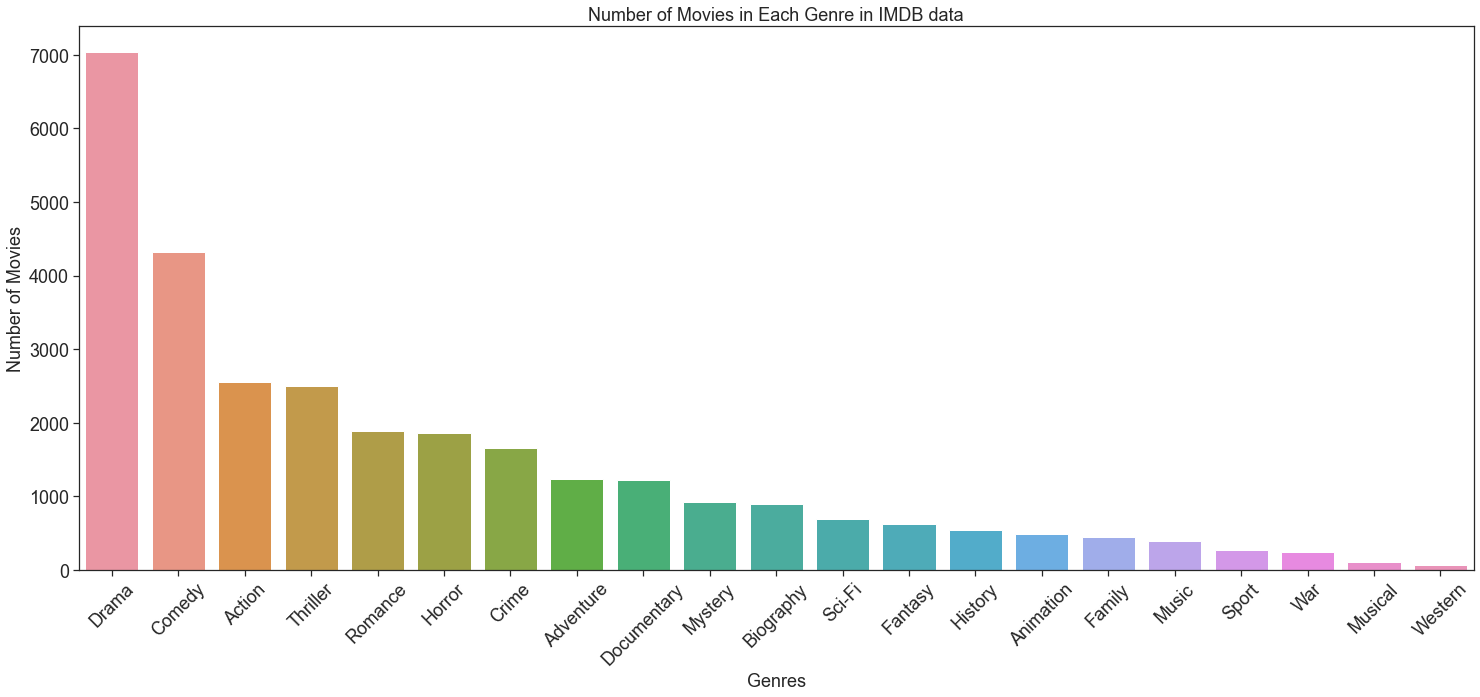

In [31]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(25, 10)) 
ax = sns.countplot(x="genres", data=sorted_df, order=sorted_df['genres'].value_counts().index)
ax.set_title('Number of Movies in Each Genre in IMDB data',fontsize=18)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=18);
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Genres vs. Average Ratings 

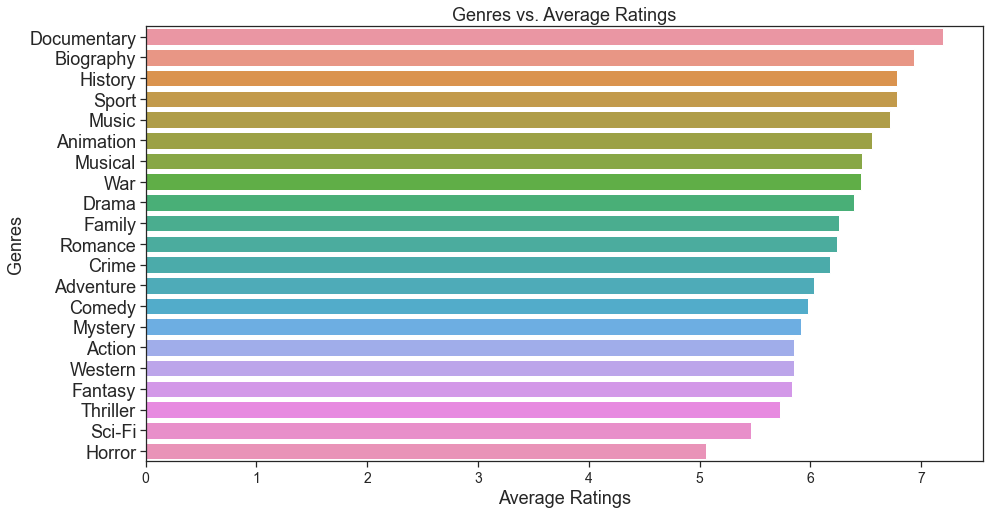

In [32]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=imdb_genre_rating_df.index, x ='averagerating', data=imdb_genre_rating_df)
ax.set_title('Genres vs. Average Ratings', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Average Ratings', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);


If the Microsoft company is concerned about average ratings of their future movie, Documentary, Biography, or History genres are the best options. These categories have very niche group of viewers, not the general audience, but their future movie will probably have better ratings than compared to the other genres. 


Now we will look into popularity measure.

---

## 2.2. Movie Genres vs. Popularity Relationship

Here we will do analysis according to genres vs popularity measure. 

The data we used for this analysis is TMDB movies data stored in in 'tmdb.movies.csv' file.

For the consistency of the analysis, we will focus on movies released between 2010 - 2019.

### 2.2.1. Importing the Data

In [33]:
tmdb = pd.read_csv('data/tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### 2.2.2. Preparing Dataframes 

In [34]:
tmdb['release_year']=pd.DatetimeIndex(tmdb['release_date']).year
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [35]:
tmdb2010_2019= tmdb[(tmdb['release_year']>=2010) & (tmdb['release_year']<2020)] 
tmdb2010_2019['release_year'].value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
2019      63
Name: release_year, dtype: int64

Now, we need to change genre ids into associated genre names. In order to do this we need to define genre id to genre name dictionary to give the key value pairs for each genre type.

In [36]:
genre_id_dict = {"28": "Action", "12": "Adventure", "16": "Animation", "35":"Comedy", "80": "Crime", "99": "Documentary",
                 "18": "Drama", "10751": "Family", "14": "Fantasy", "36": "History", "27": "Horror", "10402": "Music",
                 "9648": "Mystery", "10749": "Romance", "878": "Science Fiction", "10770": "TV Movie", "53": "Thriller",
                 "10752": "War", "37": "Western"}

In [37]:
tmdb2010_2019 = tmdb2010_2019.replace(pd.Series(genre_id_dict).astype(str), regex=True)
tmdb2010_2019

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,2010
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[Horror, Drama]",488143,en,Laboratory Conditions,0.600,20Drama-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[Drama, Thriller]",485975,en,_EXHIBIT_84xxx_,0.600,20Drama-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,2018
26515,26515,"[Family, Adventure, Action]",366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018


In [38]:
tmdb2010_2019['genre_ids']= tmdb2010_2019['genre_ids'].str.strip(" ] [")

In [39]:
tmdb2010_2019['genre_ids'].value_counts()

Documentary                                                 3687
                                                            2472
Drama                                                       2248
Comedy                                                      1653
Horror                                                      1139
                                                            ... 
Action, Crime, Science Fiction, Thriller, Mystery, Drama       1
Animation, Drama, Mystery, Science Fiction                     1
Thriller, Crime, Drama, Romance                                1
Action, Adventure, Animation, Family, Fantasy, Comedy          1
Comedy, Romance, TV Movie, Fantasy                             1
Name: genre_ids, Length: 2452, dtype: int64

In [40]:
# Here is all the genres with null entries.
tmdb2010_2019[tmdb2010_2019['genre_ids'] == str()]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
517,517,,31059,ru,Наша Russia: Яйца судьбы,3.867,2010-01-21,Nasha Russia: Yaytsa sudby,4.3,25,2010
559,559,,151316,en,Shrek’s Yule Log,3.424,2010-Adventure-07,Shrek’s Yule Log,4.7,9,2010
589,589,,75828,en,Erratum,3.154,2010-09-Animation,Erratum,6.6,7,2010
689,689,,150782,en,Bikini Frankenstein,2.625,2010-01-Drama,Bikini Frankenstein,6.0,4,2010
731,731,,200946,en,Weakness,2.451,2010-10-24,Weakness,4.5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...
26495,26495,,556601,en,Recursion,0.600,20Drama-08-Action,Recursion,2.0,1,2018
26497,26497,,514045,en,The Portuguese Kid,0.600,20Drama-02-Fantasy,The Portuguese Kid,2.0,1,2018
26498,26498,,497839,en,The 23rd Annual Critics' Choice Awards,0.600,20Drama-01-11,The 23rd Annual Critics' Choice Awards,2.0,1,2018
26500,26500,,561932,en,Two,0.600,20Drama-02-04,Two,1.0,1,2018


In [41]:
tmdb2010_2019_clean = tmdb2010_2019[tmdb2010_2019['genre_ids'] != str()]

In [42]:
tmdb2010_2019_clean['genre_ids'].value_counts()

Documentary                             3687
Drama                                   2248
Comedy                                  1653
Horror                                  1139
Thriller                                 479
                                        ... 
Documentary, Music, History                1
Horror, Adventure                          1
Family, Science Fiction, Comedy            1
War, Documentary, Adventure, History       1
Romance, Fantasy, Family, Drama            1
Name: genre_ids, Length: 2451, dtype: int64

In [43]:
tmdb2010_2019_clean['genre_ids']= tmdb2010_2019_clean['genre_ids'].str.split(", ")
tmdb_exploded = tmdb2010_2019_clean.explode('genre_ids')
tmdb_exploded

<ipython-input-43-57175bbb6fc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb2010_2019_clean['genre_ids']= tmdb2010_2019_clean['genre_ids'].str.split(", ")


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
1,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,Family,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26515,26515,Adventure,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26515,26515,Action,366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,2018
26516,26516,Thriller,309885,en,The Church,0.600,20Drama-10-05,The Church,0.0,1,2018


In [44]:
tmdb_exploded['genre_ids'].value_counts()

Drama              8207
Comedy             5597
Documentary        4945
Thriller           4165
Horror             3658
Action             2567
Romance            2294
Science Fiction    1743
Family             1538
Crime              1484
Animation          1452
Adventure          1368
Music              1251
Mystery            1223
Fantasy            1113
TV Movie           1077
History             611
War                 323
Western             204
Name: genre_ids, dtype: int64

In [45]:
tmdb_pop_genre = tmdb_exploded[['popularity', 'genre_ids']]
tmdb_pop_genre

,popularity,genre_ids
0,33.533,Adventure
0,33.533,Fantasy
0,33.533,Family
1,28.734,Fantasy
1,28.734,Adventure
...,...,...
26515,0.600,Family
26515,0.600,Adventure
26515,0.600,Action
26516,0.600,Thriller


### 2.2.3. Grouping Popularity by Genres

We will group by genres and calculate average popularity for  each genre.

In [46]:
tmdb_pop_genre_df= tmdb_pop_genre.groupby(['genre_ids']).mean().sort_values(by='popularity', ascending =False)
tmdb_pop_genre_df

,popularity
genre_ids,
Adventure,7.506921
Action,6.417480
Fantasy,6.287668
Crime,5.360015
Science Fiction,5.167303
War,5.146235
Thriller,4.781564
Mystery,4.739093
Family,4.618991


### 2.2.4. Visualization

#### Number of Movies in Each Genre with TMDB data

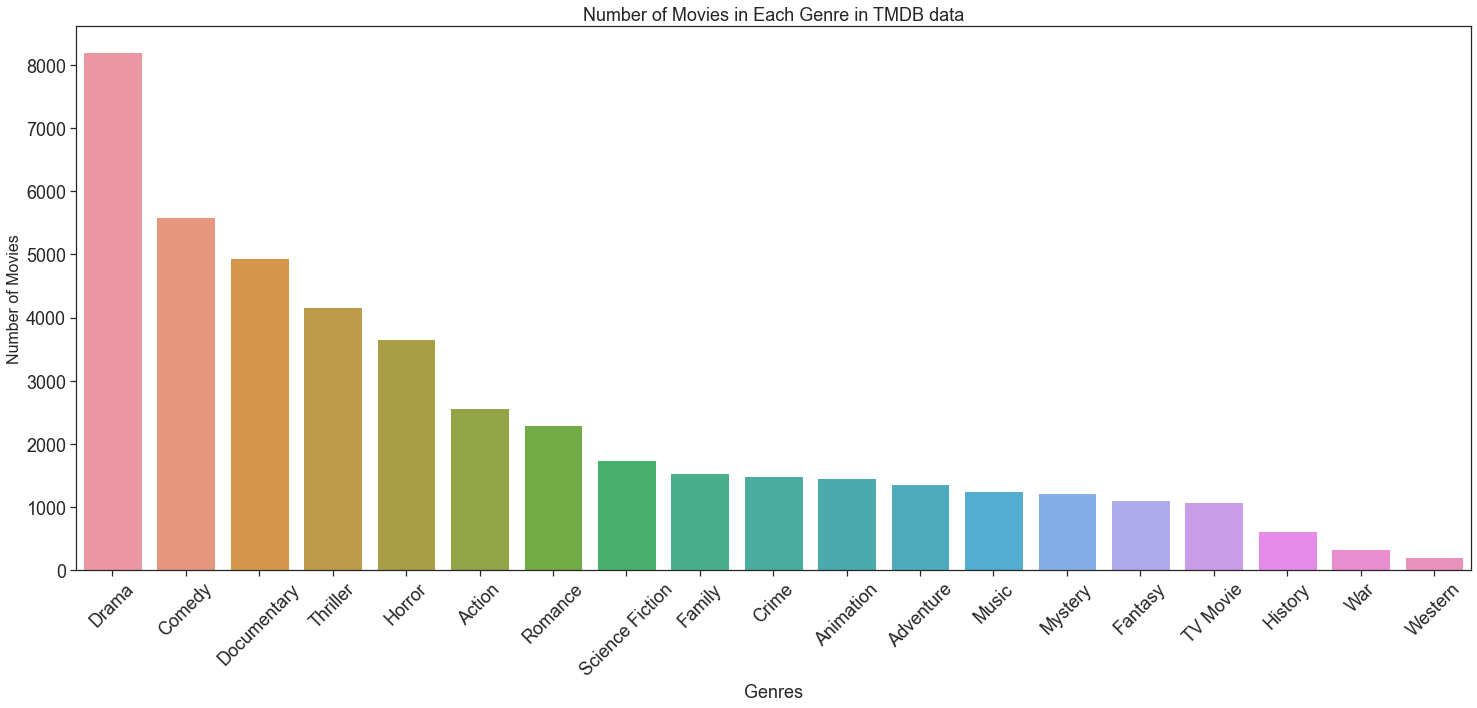

In [47]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(25, 10)) 
ax = sns.countplot(x="genre_ids", data=tmdb_exploded, order=tmdb_exploded['genre_ids'].value_counts().index)
ax.set_title('Number of Movies in Each Genre in TMDB data',fontsize=18)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=16);
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Genres vs. Popularity

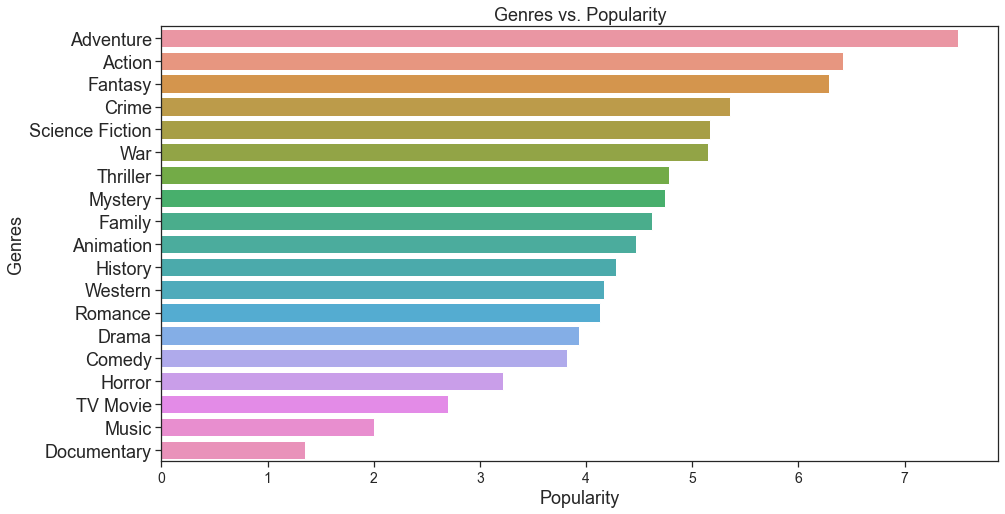

In [48]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=tmdb_pop_genre_df.index, x = 'popularity', data=tmdb_pop_genre_df)
ax.set_title('Genres vs. Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);

Doing an anlysis with popularity measure gave us different results compared to average reatings measure. According to popularity analysis, Adventure, Action, or Fantasy genres are the best options.

Now, let's put two bar charts together and compare our findings!

### 2.3. Comparison and Conclusion

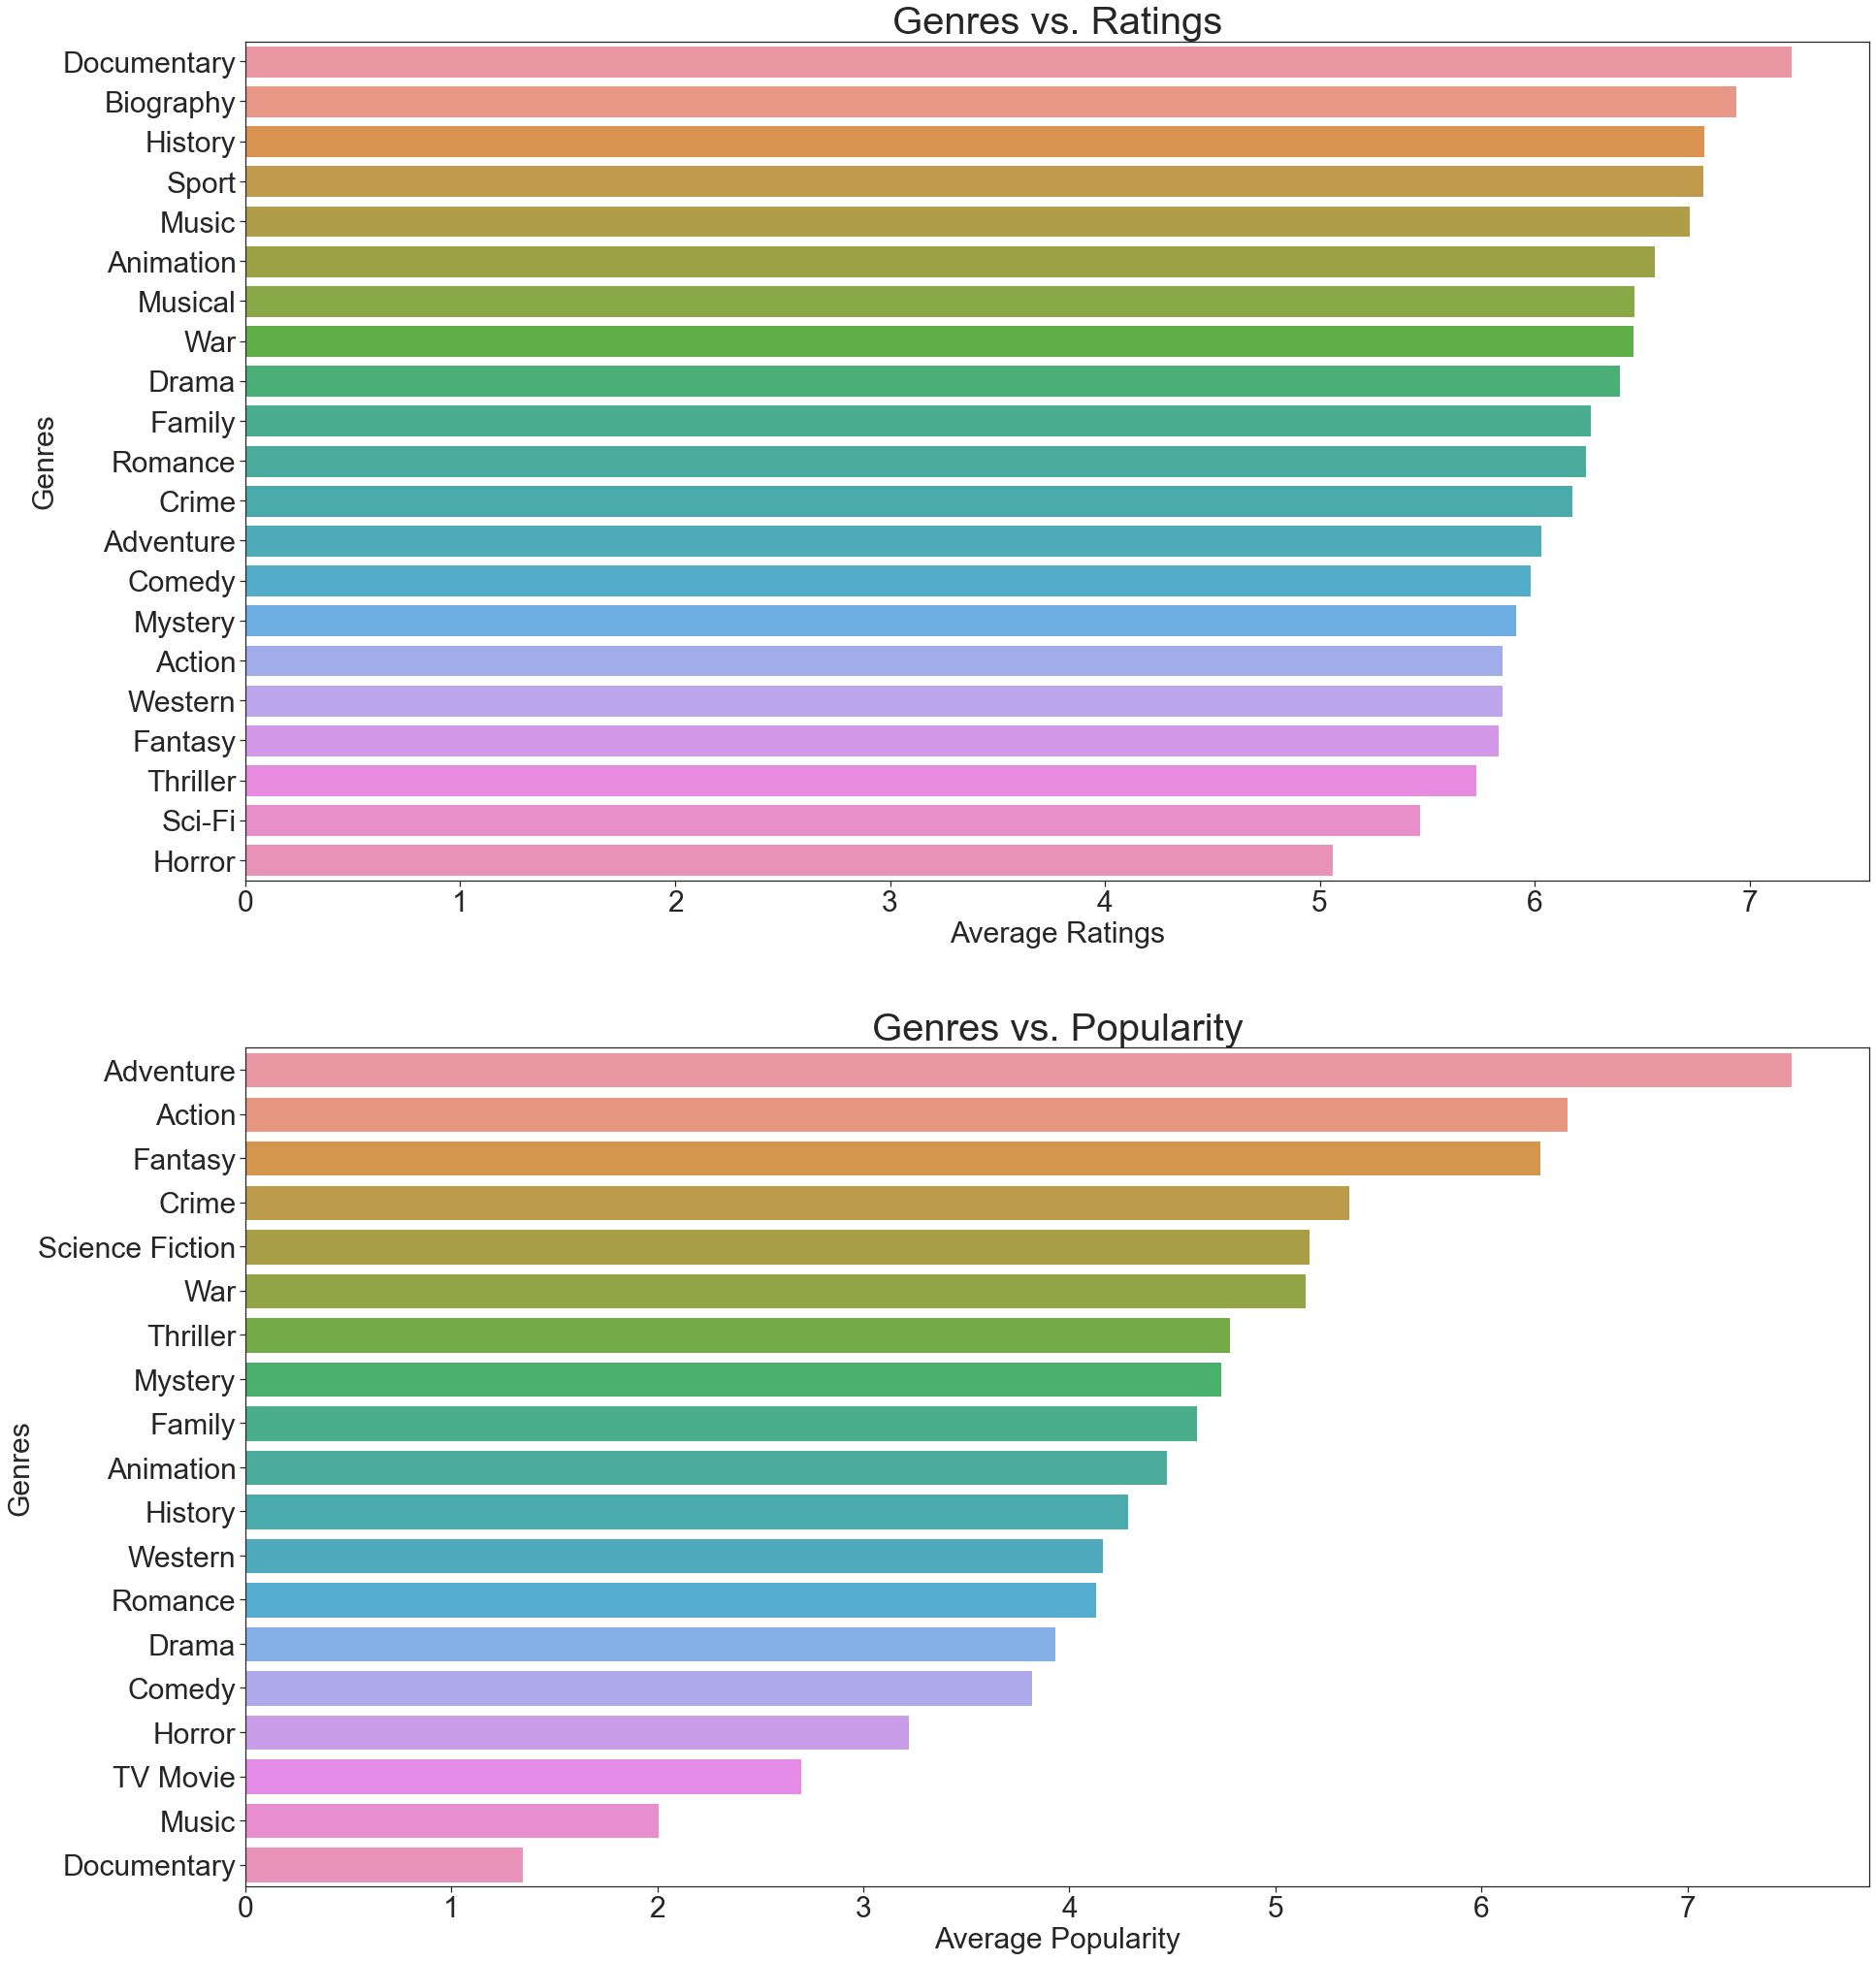

In [49]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
figure, axs= plt.subplots(nrows=2, figsize=(30, 35))

sns.barplot(y=imdb_genre_rating_df.index, x ='averagerating', data=imdb_genre_rating_df, ax=axs[0])
sns.barplot(y=tmdb_pop_genre_df.index, x = 'popularity', data=tmdb_pop_genre_df, ax=axs[1])

axs[0].set_title('Genres vs. Ratings', fontsize=40)
axs[0].set_xlabel('Average Ratings', fontsize=30);
axs[0].set_ylabel('Genres', fontsize=30)
axs[0].tick_params(labelsize=30)


axs[1].set_title('Genres vs. Popularity', fontsize=40)
axs[1].set_ylabel('Genres', fontsize=30)
axs[1].set_xlabel('Average Popularity', fontsize=30)
axs[1].tick_params(labelsize=30);

According to both analyses, it is seen that there is no straightforward answer for which genre types should be recommended to the Microsoft Studio team. 

If the Microsoft team more concerned about the ratings of their future films, producing movies in Documentary, Biography, or History categories will be a better option. These genres have less total movie counts, but they have higher ratings due to their niche audience. However, choosing genre type according to average rating measure cannot guarentee it will be watched by general audience.

On the other hand, if the Microsoft team is more concerned about the popularity of their future films, sticking to Adventure, Action, or Fantasy genres will be a better option. These genres will bring more popularity to their future movies, which can also increase popularity of Microsoft brand itself. These movies reach larger general audience rather than niche group of viewers.

Therefore, we can conclude that choosing the best genre for a future movie depends heavily on the expectation of the Microsoft team. However, as a team we advise Microsoft team to focus on popularity to have more reach for their future films. Popular movies can include cultural diversity, help to create social inclusion, and make long lasting impact on people globally. 

For further investigation, we looked into a new measure by combining average ratings with popularity. This new measure can give Microsoft team a new insight by comparing average ratings per popularity for each genre category. The results of this new measure can be found in appendix section.

---

# 3. Cast and Crew Analysis


## Business Recommendation

   The business recommendation I will be delivering to the Microsoft Studio team will be ordered lists of the actors and crew members whose movies made the most money over the last ten years, measured by net profit. This is to ensure that once the studio is up and running, the creatives associated with the most profitable films of the last ten years can be hired. This will ensure that Microsoft Studio's investment in personnel is as fruitful as possible. 

## 3.1. Reading the Data 

The data used in this analysis comes mostly from [IMDB](https://www.imdb.com/?ref_=nv_home), the go-to online database for information about movies. IMDB is so perfect for this analysis because it painstakingly tracks all the people involved in the making of movies, where many other websites simply track reviews. 

The one caveat to this is that IMDB does not track financial data for the films in its database. The revenues and profitability of the last decade's films are at the core of the business insights I will deliver to the Microsoft Studios team. So I will combine IMDB's cast and crew data with movie accounting information from [The Numbers](https://www.the-numbers.com/), a website wholly devoted to recording movie revenues. 

IMDB has a massive catalogue of films, which for us is a double edged sword. While this quantity of information makes for robust analysis, it also enhances the complexity of our process. 

In [50]:
# Turning the relevant csv files into pandas dataframes we can work with

name_keys = pd.read_csv('data/imdb.name.basics.csv')

title_keys = pd.read_csv('data/imdb.title.akas.csv')

names_to_jobs = pd.read_csv('data/imdb.title.principals.csv')

financials = pd.read_csv('data/tn.movie_budgets.csv')

## 3.2. Preparing our Dataframes 

### 3.2.1. Name Keys

As our dataframes stand right now, they contain unneccessary data, redundant data, and null values. 

When examining the first rows of the IMDB dataframes, I noticed that titles and names are often stored as codes instead of plain-text. I realized this is due to the fact that IMDB is a global website, and movies have a global audience, so instead of storing redundant data in every language, they store information under name and title codes. Much of our data preperation will be translating coded names and titles into their plain-text english versions. 

name_keys is the first dataframe I will prepare. The label I have chosen for this dataframe is due to the fact that it ties imdb's internal name codes to the real world names of the cast and crew members. 

To prepare this dataframe, I will remove any rows where the death_year column is not NaN, as I cant recommend Microsoft Studios attempt to hire the deceased to work on their upcoming projects.

I will then remove all columns except nconst and primary_name, as I am only interested in the values in these two columns.

In [51]:
# Here I am removing the 1000 or so columns with a non null value 

def stringify(s):
    return str(s)

name_keys['death'] = name_keys['death_year'].map(stringify)

name_keys = name_keys[ name_keys['death'] == 'nan']

# Selecting all the rows with Null values in the death_year column, then selecting the columns I want.

name_keys = name_keys[['nconst', 'primary_name']]

name_keys.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


### 3.2.2. Title Keys

This dataframe is named title_keys because much like name_keys, it will allow us to tie the english titles of movies to IMDB's internal title code for those movies. 

To prepare this dataframe we will select only rows where the region is US, because our financials table has both domestic and international revenue data, so we only need the US titles to access global revenue data. 

The last cleaning step to perform is to keep in mind that IMDB does not provide financial data, so we are going to have to merge our IMDB dataframes with our financial dataframe, to facilitate this merge, I will write a function to remove all whitespace, capitalizations, and punctuation in case they differ between the two different dataframes. We can resuse this funciton later on to clean the financials title column in the same way. 

Then we will grab only the title_id and title columns, as these will serve as our keys, and none of the other coumns serve our specific analysis goal. 

In [52]:
# Grabbing the relevant columns
title_keys = title_keys.loc[title_keys['region'] == 'US', ['title_id', 'title']]

# Our title cleaning function
def title_cleaner(string):
    new_string = ''
    alpha = 'abcdefghijklmnopqrstuvwxyz0123456789'
    string = string.lower()
    for i in string:
        if i in alpha:
            new_string += i
    return new_string
    
# Creating a new column filled with cleaned titles
title_keys['clean_title'] = title_keys['title'].map(title_cleaner)
    
# Getting rid of the original title name column 
title_keys = title_keys[['title_id','clean_title']]

# Sanity Check 
title_keys.head()

,title_id,clean_title
12,tt0369610,jurassicworld3d
20,tt0369610,jurassicworld
21,tt0369610,ebbtide
28,tt0369610,jurassicparkiv
37,tt0369610,jurassicpark4


### 3.2.3. Names and Jobs

The names_to_jobs dataframe lists movies (as their IMDB title codes) , and the names of people who worked on them (as their IMDB name codes) as well as their role in the production, and character name if they are an actor. 

This dataframe will eventually serve as the base for the final combined dataframe we will run our analysis on. 

To clean up this dataframe, we will drop rows with NaN values, and select the columns of interest to us, which are tconst, nconst, and category

In [53]:
# Removing rows with Null values in essential columns
names_to_jobs.dropna(subset=['tconst', 'nconst', 'category'])

# Selecting only those essential columns 
names_to_jobs = names_to_jobs[['tconst', 'nconst', 'category']]

# Sanity check
names_to_jobs.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


### 3.2.4. The Financials

The final dataframe required is the financials dataframe. This dataframe is critical to our cast and crew analysis because it contains the accounting data we will use to calculate the profit of each movie.

Our team has decided to only look at movies released in the last ten years. We believe this achieves a balance between sample size, and not including movies that are too old to be relevant. To meet this goal I will convert the last 4 elements of the strings in the release_date column to an integer to obtain the year, and filter my dataframe based on the result. 

The next issue we need to deal with is turning the numbers, stored as strings, into integers so we can perform arithmetic operations on them. We can achieve this by replacing the $ with nothing, then using the int() function. 

I can then subtract the budget from the global box office numbers to calculate net profit. 



Finally we will apply our title cleaning function from above, and select only the columns of interest to us. 

In [54]:
# Defining our string to integer conversion function, to get year as a number
def convert_year(string):
    return int(string[-4:])

# Creating a new column year by applying our conversion function to the 'release date' column
financials['year'] = financials['release_date'].map(convert_year)

# Getting only the rows from the last ten years 
financials = financials.loc[ financials['year'] >= 2011 ]

# Defining our function to convert the dolalr amounts stored as strings into integers
def convert_money(string):
    return int(string.replace('$','').replace(',',''))

# Making two new columns to hold our integer money values
financials['budget'] = financials['production_budget'].map(convert_money)
financials['global_gross'] = financials['worldwide_gross'].map(convert_money)

# Making a net profit column 
financials['net_profit'] = financials['global_gross'] - financials['budget']

# Creating a clean name column to hold the results of our title cleaning function
financials['clean_name'] = financials['movie'].map(title_cleaner)

# Selecting our shiny new processed columns
financials = financials[['clean_name', 'budget', 'net_profit']]

# Sanity check after all of those changes
financials.head()

,clean_name,budget,net_profit
1,piratesofthecaribbeanonstrangertides,410600000,635063875
2,darkphoenix,350000000,-200237650
3,avengersageofultron,330600000,1072413963
4,starwarsepviiithelastjedi,317000000,999721747
5,starwarsepviitheforceawakens,306000000,1747311220


## 3.3. Combining our Processed Dataframes

Now that all of our dataframes are better formatted, lets start smashing them together into something more useful. With names_to_jobs as our base structure to build upon, we will combine our dataframes in a series of three merges.

Merge 1 is combining names_to_jobs with name_keys. This will allow us to see the plain text english names of all the people listed in our names_to_jobs dataframe. 

Merge 2 is connecting our merge 1 dataframe to title_keys, this translates our IMDB title codes into plain text movie title names. 

Merge 3 is combining the merge 2 dataframe, which is all IMDB information with our outside financial data. These two dataframes will be stitched together based on their cleaned and stripped title columns. 

Then after looking at the data I noticed that several rows where the title columns were empty, and the financial data was repeating in a very suspicious pattern, so I removed any rows that did not have a title name. 

Finally I used drop_duplicates so that our data would not be skewed by repeated rows. 

In [55]:
# Adding the plain-text names onto our main dataframe
merged = names_to_jobs.merge(name_keys, left_on=['nconst'], right_on=['nconst'])

# Adding the plain-text titles onto our main dataframe 
merged_2 = merged.merge(title_keys, left_on=['tconst'], right_on=['title_id'])

# Adding the financial data onto our main dataframe where the seperately cleaned titles match up
merged_3 = merged_2.merge(financials, left_on=['clean_title'], right_on=['clean_name'])

# Removing rows without titles that were exhibiting suspicious activity 
cleaned_merged_3 = merged_3.loc[ merged_3['clean_title'] != '']

# Dropping duplicate rows to ensure our net profits are not inflated by counting rows multiple times
cleaned_merged_3 = cleaned_merged_3.drop_duplicates()


# The all important sanity check
cleaned_merged_3.iloc[3000:3005]

,tconst,nconst,category,primary_name,title_id,clean_title,clean_name,budget,net_profit
3145,tt1655460,nm0000098,actress,Jennifer Aniston,tt1655460,wanderlust,wanderlust,32500000,-8340066
3146,tt1655460,nm0748620,actor,Paul Rudd,tt1655460,wanderlust,wanderlust,32500000,-8340066
3147,tt1655460,nm0857620,actor,Justin Theroux,tt1655460,wanderlust,wanderlust,32500000,-8340066
3148,tt1655460,nm0015196,actress,Malin Akerman,tt1655460,wanderlust,wanderlust,32500000,-8340066
3149,tt1655460,nm0547800,writer,Ken Marino,tt1655460,wanderlust,wanderlust,32500000,-8340066


## 3.4. Grouping by Job Title, Ordering by Performance

Now that we have our final, composite dataframe, we can extract wisdom out of the data. This specific analysis perspective calls for the grouping of rows based on job title, and then ordering the results by sum net profits. What this will provide for us is a collection of lists, telling us in descending order who the most commercially successful directors, producers, actors, actresses, and writers are. 

In [56]:
# Sorting our final dataframe by the job title 'director', then sorting by descending sum of net profits
directors = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'director']
directors = directors.groupby(['primary_name']).sum().sort_values(['net_profit'], ascending=False)
directors = directors.iloc[:15, : ]


directors_avg = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'director']
series = list(directors_avg['net_profit'])


# Repeating the process for producers
producers = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'producer']
producers = producers.groupby(['primary_name']).sum().sort_values(['net_profit'], ascending=False)
producers = producers.iloc[:15, : ]

# Repeating the process for actors
actors = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'actor']
actors = actors.groupby(['primary_name']).sum().sort_values(['net_profit'], ascending=False)
actors = actors.iloc[:15, : ]

# Repeating the process for actresses
actresses = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'actress']
actresses = actresses.groupby(['primary_name']).sum().sort_values(['net_profit'], ascending=False)
actresses = actresses.iloc[:15, : ]

# Repeating the process for writers
writers = cleaned_merged_3.loc[ cleaned_merged_3['category'] == 'writer']
writers = writers.groupby(['primary_name']).sum().sort_values(['net_profit'], ascending=False)
writers = writers.iloc[:15, : ]

# Sanity check incoming
directors.head()

,budget,net_profit
primary_name,,
Joe Russo,720000000,3182605502
Anthony Russo,720000000,3182605502
Joss Whedon,555600000,2365349860
Bill Condon,449700000,2334798666
Michael Bay,698000000,2283409620


## 3.5. Visualization and Summary 

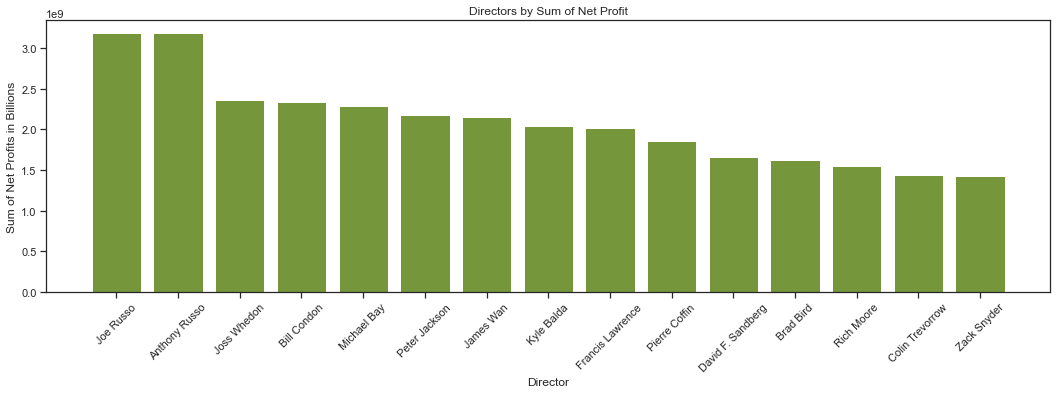

In [57]:
crew_recommendations, Directors = plt.subplots(figsize=(18, 5)) 
plt.xticks(rotation=45)
Directors.bar(directors.index, directors['net_profit'], color='#76963c')
Directors.set_title('Directors by Sum of Net Profit')
Directors.set_xlabel('Director')
Directors.set_ylabel('Sum of Net Profits in Billions')
plt.savefig('directors')

### Directors

There is no single variable more influential on the quality of a film than who the director is. Movies often live or die based on if the director is able to deftly compose all of the disparate people and departments into a cohesive narrative. Not only is the quality of the film dependent on the quality of the director, many 'all-star' directors can be a massive draw to a movie, possibly even more than the principal actors. 

This list is of extreme value to Microsoft Studios as choosing directors whose films consistently generate profit will be essential in the early stages of the studio's development. 

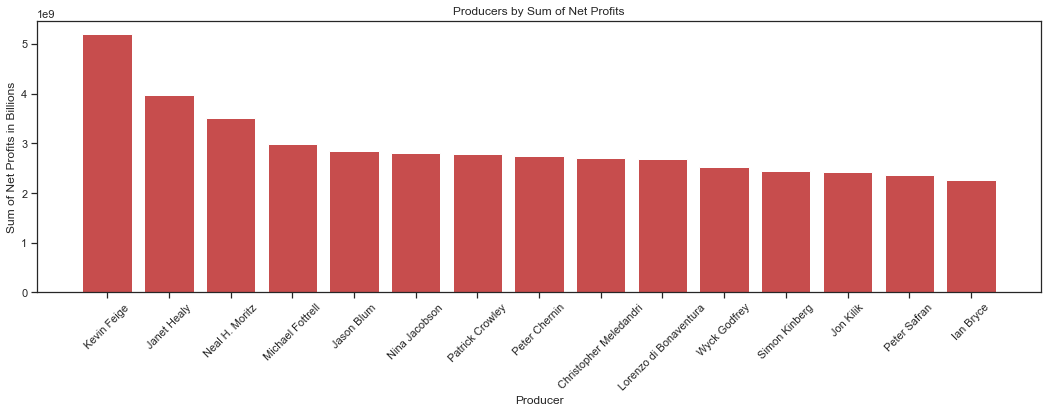

In [58]:
crew_recommendations, Producers = plt.subplots(figsize=(18, 5)) 
plt.xticks(rotation=45)
Producers.bar(producers.index, producers['net_profit'], color='#c74d4d')
Producers.set_title('Producers by Sum of Net Profits')
Producers.set_xlabel('Producer')
Producers.set_ylabel('Sum of Net Profits in Billions')
plt.savefig('producers')

### Producers

This list of the top fifteen most profitable producers will give Microsoft Studios a direction on who can provide domain knowledge to the executives chosen to run the studio. Microsoft should reach out to either directly hire, or partner with these producers, as they consistently fund projects that generate high net profits. 

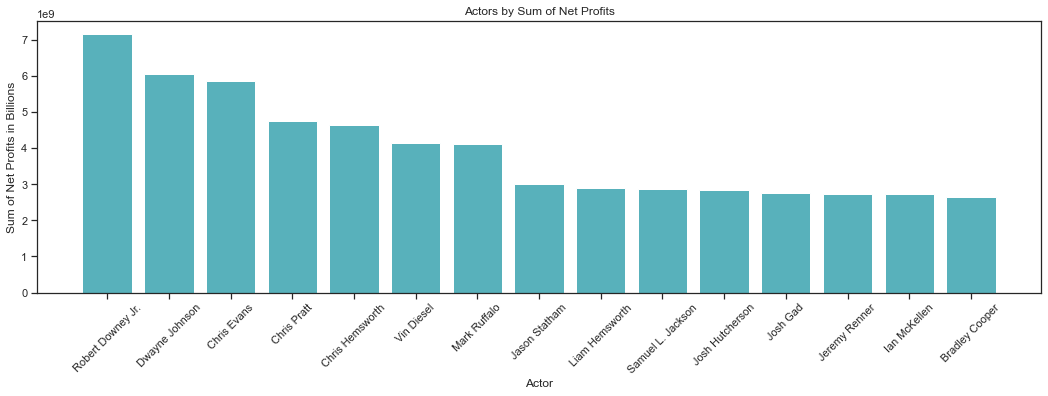

In [59]:
crew_recommendations, Actors = plt.subplots(figsize=(18, 5)) 
plt.xticks(rotation=45)
Actors.bar(actors.index, actors['net_profit'], color='#58b1bb')
Actors.set_title('Actors by Sum of Net Profits')
Actors.set_xlabel('Actor')
Actors.set_ylabel('Sum of Net Profits in Billions')
plt.savefig('actors')

### Actors 

Dominated by stars of Marvel Comic book movies, this list will help point Microsoft Studios towards the actors people know, that will draw in audiences to the Microsoft streaming platform. 

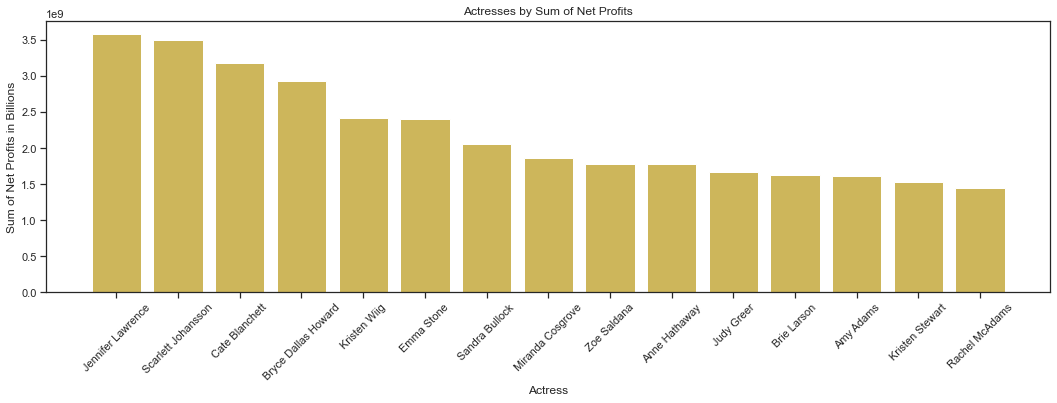

In [60]:
crew_recommendations, Actresses = plt.subplots(figsize=(18, 5)) 
plt.xticks(rotation=45)
Actresses.bar(actresses.index, actresses['net_profit'], color='#cdb65b')
Actresses.set_title('Actresses by Sum of Net Profits')
Actresses.set_xlabel('Actress')
Actresses.set_ylabel('Sum of Net Profits in Billions')
plt.savefig('actresses')

### Actresses

Just like the Actors table, these 15 actresses should be Microsoft's first point of contact for casting leads in their main projects.  

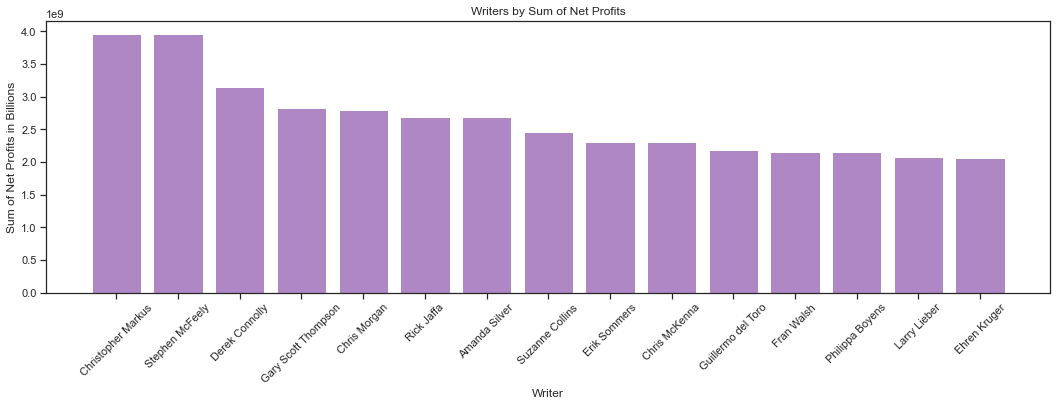

In [61]:
crew_recommendations, Writers = plt.subplots(figsize=(18, 5)) 
plt.xticks(rotation=45)
Writers.bar(writers.index, writers['net_profit'],  color='#af87c4')
Writers.set_title('Writers by Sum of Net Profits')
Writers.set_xlabel('Writer')
Writers.set_ylabel('Sum of Net Profits in Billions')
plt.savefig('writers')

### Writers

This list is a combination of people who write screenplays for movies, and writers who authored the books that popular films have been based on. This list serves a dual purpose as it both points to those people that can be hired as screenwriters to work on Microsoft's films, and also what kind of books make for good movie adaptations.  

### General Commentary on Cast & Crew Analysis

The super-elephant in the room has to be addressed. These five lists, in combination with a little domain knowledge, would make it immediately clear that some of the most profitable films of all time, and possibly ever made are modern superhero blockbusters. Eight of the top fifteen actors, four of the top fifteen actresses, the top producer, the top two writers, and the top three directors have all worked on films in, and owe most of their ranking in these charts to, Disney's Marvel Cinematic Universe. DC's competing universe makes a less dramatic, but still highly relevant showing. What this means for Microsoft Studios going forward is that in combination with our other analyses, we highly recommend that Microsoft purchase some popular yet unadapted intellectual properties. 

The other obvious feature of this data is the uncomfortable absence of women and people of color in the gender-nuetral lists. The Directors, Producers, and Writers graphics show the discrepency in how often women and POC are hired for these roles. I think this is a massive opportunity for Microsoft Studios to first of all, do their part in righting a societal wrong, but simultaneously having the knock on effect of differentiating themselves from their competitors. Doing this in transparent way would lead to all kinds of free publicity in the form of news stories and articles.

### Limitations of this Data

One critical limitaiton of this data, is that it does not account for the billing of the actors and actresses in these high revenue generating movies. For example Josh Gad is a well known actor, but probably could not have a film marketed using solely his name. However this dataset places him above actors like Jeremy Renner, Ian McKellen, and Bradley Cooper, three oscar winning movie stars who could easily have a movie marketed based on their role in the film. This is a smaller issue, as big stars will always in general come out ahead in terms of their movies having the highest net profits, but it's something to consider.


# 4. Collective Recommendations

Finally, we recommend Microsoft team to: 
- Acquire the expertise from a movie studio like Sony Pictures or Lionsgate. 
- Focus on genres that are popular, like Adventure, Action, or Fantasy, to have more reach.
- Represent people equally in films through the cast and crew.


---

# Appendix

## A.1. Average Ratings per Popularity Measure for Movie Genres

In order to calculate average ratings per popularity, we will use TMDB movies data stored in in 'tmdb.movies.csv' file, and focus on movies with release year between 2010 to 2019. For popularity analysis above, we cleaned the data, filtered out the years which are out of our range, and exploded genre names into seperate rows. For this analysis we will use the same dataframe by focusung on 'popularity', 'vote_average', 'vote_count' and 'genre_ids' columns.

This analysis may give more accurate results if the IMDB dataframe is merged with TMDB dataframe, and then average rating values are used from IMDB dataframe and popularity values are used from TMDB dataframe. This approach is recommended as a next step of genre analysis, but now we will multiply 'vote_average' with 'vote_count' from TMDB dataframe as a proxy for average ratings for this work. 

Let's starts recalling the TMDB dataframe from above.

In [62]:
tmdb_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44820 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         44820 non-null  int64  
 1   genre_ids          44820 non-null  object 
 2   id                 44820 non-null  int64  
 3   original_language  44820 non-null  object 
 4   original_title     44820 non-null  object 
 5   popularity         44820 non-null  float64
 6   release_date       44820 non-null  object 
 7   title              44820 non-null  object 
 8   vote_average       44820 non-null  float64
 9   vote_count         44820 non-null  int64  
 10  release_year       44820 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 5.4+ MB


In [63]:
ratings_per_popularity = tmdb_exploded[['genre_ids','popularity', 'vote_average', 'vote_count']]
ratings_per_popularity

,genre_ids,popularity,vote_average,vote_count
0,Adventure,33.533,7.7,10788
0,Fantasy,33.533,7.7,10788
0,Family,33.533,7.7,10788
1,Fantasy,28.734,7.7,7610
1,Adventure,28.734,7.7,7610
...,...,...,...,...
26515,Family,0.600,0.0,1
26515,Adventure,0.600,0.0,1
26515,Action,0.600,0.0,1
26516,Thriller,0.600,0.0,1


In [64]:
ratings_per_popularity = ratings_per_popularity[ratings_per_popularity['vote_count'] >500]
ratings_per_popularity

,genre_ids,popularity,vote_average,vote_count
0,Adventure,33.533,7.7,10788
0,Fantasy,33.533,7.7,10788
0,Family,33.533,7.7,10788
1,Fantasy,28.734,7.7,7610
1,Adventure,28.734,7.7,7610
...,...,...,...,...
24462,Animation,6.868,7.4,721
24462,Fantasy,6.868,7.4,721
24462,Adventure,6.868,7.4,721
24462,Comedy,6.868,7.4,721


In [65]:
ratings_per_popularity['ratingsum'] = ratings_per_popularity['vote_average']*ratings_per_popularity['vote_count']
ratings_per_popularity

<ipython-input-65-0389de1aabcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_per_popularity['ratingsum'] = ratings_per_popularity['vote_average']*ratings_per_popularity['vote_count']


,genre_ids,popularity,vote_average,vote_count,ratingsum
0,Adventure,33.533,7.7,10788,83067.6
0,Fantasy,33.533,7.7,10788,83067.6
0,Family,33.533,7.7,10788,83067.6
1,Fantasy,28.734,7.7,7610,58597.0
1,Adventure,28.734,7.7,7610,58597.0
...,...,...,...,...,...
24462,Animation,6.868,7.4,721,5335.4
24462,Fantasy,6.868,7.4,721,5335.4
24462,Adventure,6.868,7.4,721,5335.4
24462,Comedy,6.868,7.4,721,5335.4


In [66]:
ratings_per_popularity['rating_per_popularity'] = ratings_per_popularity['ratingsum']/ratings_per_popularity['popularity']
ratings_per_popularity

<ipython-input-66-839d81e4aa03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_per_popularity['rating_per_popularity'] = ratings_per_popularity['ratingsum']/ratings_per_popularity['popularity']


,genre_ids,popularity,vote_average,vote_count,ratingsum,rating_per_popularity
0,Adventure,33.533,7.7,10788,83067.6,2477.189634
0,Fantasy,33.533,7.7,10788,83067.6,2477.189634
0,Family,33.533,7.7,10788,83067.6,2477.189634
1,Fantasy,28.734,7.7,7610,58597.0,2039.291432
1,Adventure,28.734,7.7,7610,58597.0,2039.291432
...,...,...,...,...,...,...
24462,Animation,6.868,7.4,721,5335.4,776.849156
24462,Fantasy,6.868,7.4,721,5335.4,776.849156
24462,Adventure,6.868,7.4,721,5335.4,776.849156
24462,Comedy,6.868,7.4,721,5335.4,776.849156


In [67]:
ratings_per_popularity_df = ratings_per_popularity.groupby(['genre_ids']).mean()
ratings_per_popularity_df

,popularity,vote_average,vote_count,ratingsum,rating_per_popularity
genre_ids,,,,,
Action,18.414539,6.381360,3773.403509,25462.415570,1528.288417
Adventure,19.718027,6.530091,4694.224924,32310.188146,1730.804926
Animation,16.168880,6.983803,2734.823944,19563.827465,1219.966236
Comedy,13.494346,6.464370,2220.057087,15068.209252,1096.839656
Crime,14.124996,6.528692,2270.004219,15465.440928,1222.236243
Documentary,9.435400,7.520000,691.600000,5211.800000,594.569798
Drama,12.975031,6.838441,2228.063172,15872.598790,1096.244708
Family,16.427902,6.716763,3049.861272,21381.839306,1261.522877
Fantasy,18.331484,6.476959,3744.631336,25261.359908,1252.258767


In [68]:
ratings_per_popularity_df['normalized']= ratings_per_popularity_df['rating_per_popularity']/ratings_per_popularity_df['rating_per_popularity'].sum()*100
ratings_per_popularity_df

,popularity,vote_average,vote_count,ratingsum,rating_per_popularity,normalized
genre_ids,,,,,,
Action,18.414539,6.381360,3773.403509,25462.415570,1528.288417,6.877933
Adventure,19.718027,6.530091,4694.224924,32310.188146,1730.804926,7.789342
Animation,16.168880,6.983803,2734.823944,19563.827465,1219.966236,5.490355
Comedy,13.494346,6.464370,2220.057087,15068.209252,1096.839656,4.936235
Crime,14.124996,6.528692,2270.004219,15465.440928,1222.236243,5.500571
Documentary,9.435400,7.520000,691.600000,5211.800000,594.569798,2.675811
Drama,12.975031,6.838441,2228.063172,15872.598790,1096.244708,4.933557
Family,16.427902,6.716763,3049.861272,21381.839306,1261.522877,5.677378
Fantasy,18.331484,6.476959,3744.631336,25261.359908,1252.258767,5.635685


In [69]:
df_rating_per_popularity = ratings_per_popularity_df.sort_values(by='normalized', ascending =False)
df_rating_per_popularity

,popularity,vote_average,vote_count,ratingsum,rating_per_popularity,normalized
genre_ids,,,,,,
Science Fiction,18.441943,6.450410,4567.008197,31302.035246,1851.856009,8.334122
Adventure,19.718027,6.530091,4694.224924,32310.188146,1730.804926,7.789342
Western,15.305545,6.581818,3935.590909,28120.372727,1585.119771,7.133698
Action,18.414539,6.381360,3773.403509,25462.415570,1528.288417,6.877933
Family,16.427902,6.716763,3049.861272,21381.839306,1261.522877,5.677378
Fantasy,18.331484,6.476959,3744.631336,25261.359908,1252.258767,5.635685
Crime,14.124996,6.528692,2270.004219,15465.440928,1222.236243,5.500571
Animation,16.168880,6.983803,2734.823944,19563.827465,1219.966236,5.490355
History,13.450781,7.030137,2135.150685,15654.823288,1129.048732,5.081189


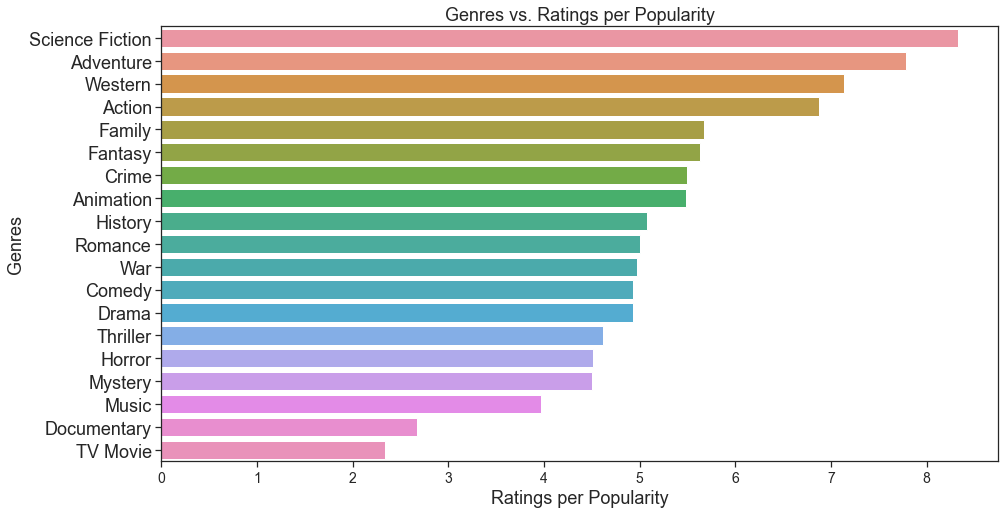

In [70]:
sns.set_theme(context='notebook',style="ticks", color_codes=True, palette='deep')
fig, ax = plt.subplots(figsize=(15, 8)) 

ax = sns.barplot(y=df_rating_per_popularity.index, x = 'normalized', data=df_rating_per_popularity)
ax.set_title('Genres vs. Ratings per Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Ratings per Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);

This final analysis shows that a future movie with science fiction, adventure, or western genre, or combination of these genres are the best if you are using ratings per popularity measure!